# DLOps Assignment 1

    Ayush Abrol B20AI052

---

## Question 1

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
import torchvision
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

c:\Users\Ayush Abrol\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Importing libraries to help read the annotations and manipulate the data folders

In [2]:
import io
import glob
import os
from shutil import move
from os.path import join
from os import listdir, rmdir

## Setting up the environment to GPU

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## Loading the data and normalizing it

In [4]:
# Loading the tiny Image Net dataset from the directory
# Path: DLOps Assignments\lab.ipynb
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                ])

trainset = datasets.ImageFolder('tiny-imagenet-200/train', transform=transform)
valset = datasets.ImageFolder('tiny-imagenet-200/val', transform=transform)
testset = datasets.ImageFolder('tiny-imagenet-200/val', transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=128, shuffle=False)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

## Reading annotations for the training data

In [5]:
# Import words.txt file for the labels
# Path: DLOps Assignments\lab.ipynb
with open('tiny-imagenet-200/words.txt') as f:
    content = f.readlines()
content = [x.strip() for x in content]
content = [x.split('\t') for x in content]
content = np.array(content)
content

array([['n00001740', 'entity'],
       ['n00001930', 'physical entity'],
       ['n00002137', 'abstraction, abstract entity'],
       ...,
       ['n15299585', 'usance'],
       ['n15299783', 'window'],
       ['n15300051', '9/11, 9-11, September 11, Sept. 11, Sep 11']],
      dtype='<U371')

## Reading annotations for the validation data

In [6]:
with open('tiny-imagenet-200/val/val_annotations.txt') as f:
    content_val = f.readlines()
content_val = [x.strip() for x in content_val]
content_val = [x.split('\t') for x in content_val]
content_val = np.array(content_val)
content_val

array([['val_0.JPEG', 'n03444034', '0', '32', '44', '62'],
       ['val_1.JPEG', 'n04067472', '52', '55', '57', '59'],
       ['val_2.JPEG', 'n04070727', '4', '0', '60', '55'],
       ...,
       ['val_9997.JPEG', 'n03424325', '10', '10', '38', '42'],
       ['val_9998.JPEG', 'n01629819', '28', '18', '63', '31'],
       ['val_9999.JPEG', 'n02699494', '17', '33', '28', '39']],
      dtype='<U13')

### Validation set labels

In [7]:
# Create a dictionary for the labels for the validation set
val_labels = []
for i in range(len(content_val)):
    val_labels.append(content_val[i][1])
val_labels = np.array(val_labels)
val_labels

array(['n03444034', 'n04067472', 'n04070727', ..., 'n03424325',
       'n01629819', 'n02699494'], dtype='<U9')

In [8]:
print(val_labels.shape)

(10000,)


In [9]:
test_labels = []
for i in range(len(content_val)):
    test_labels.append(content_val[i][1])
test_labels = np.array(test_labels)
test_labels

array(['n03444034', 'n04067472', 'n04070727', ..., 'n03424325',
       'n01629819', 'n02699494'], dtype='<U9')

In [10]:
print(test_labels.shape)

(10000,)


In [11]:
print(content.shape)

(82115, 2)


In [12]:
print(content_val.shape)

(10000, 6)


In [13]:
print("Number of images in the training set: ", len(trainset))
print("Number of images in the validation set: ", len(valset))
print("Number of images in the test set: ", len(testset))

for images, labels in trainloader:
    print("Shape of the one image batch: ", images.shape)
    print("Shape of the one label batch: ", labels.shape)
    break

Number of images in the training set:  100000
Number of images in the validation set:  5000
Number of images in the test set:  5000
Shape of the one image batch:  torch.Size([128, 3, 64, 64])
Shape of the one label batch:  torch.Size([128])


In [14]:
print(trainset.classes)
print("\nNumber of Classes: ", len(trainset.classes))

['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640', 'n01742172', 'n01768244', 'n01770393', 'n01774384', 'n01774750', 'n01784675', 'n01855672', 'n01882714', 'n01910747', 'n01917289', 'n01944390', 'n01945685', 'n01950731', 'n01983481', 'n01984695', 'n02002724', 'n02056570', 'n02058221', 'n02074367', 'n02085620', 'n02094433', 'n02099601', 'n02099712', 'n02106662', 'n02113799', 'n02123045', 'n02123394', 'n02124075', 'n02125311', 'n02129165', 'n02132136', 'n02165456', 'n02190166', 'n02206856', 'n02226429', 'n02231487', 'n02233338', 'n02236044', 'n02268443', 'n02279972', 'n02281406', 'n02321529', 'n02364673', 'n02395406', 'n02403003', 'n02410509', 'n02415577', 'n02423022', 'n02437312', 'n02480495', 'n02481823', 'n02486410', 'n02504458', 'n02509815', 'n02666196', 'n02669723', 'n02699494', 'n02730930', 'n02769748', 'n02788148', 'n02791270', 'n02793495', 'n02795169', 'n02802426', 'n02808440', 'n02814533', 'n02814860', 'n02815834', 'n02823428', 'n02837789', 'n02841315', 'n02843684'

## Visualization of data

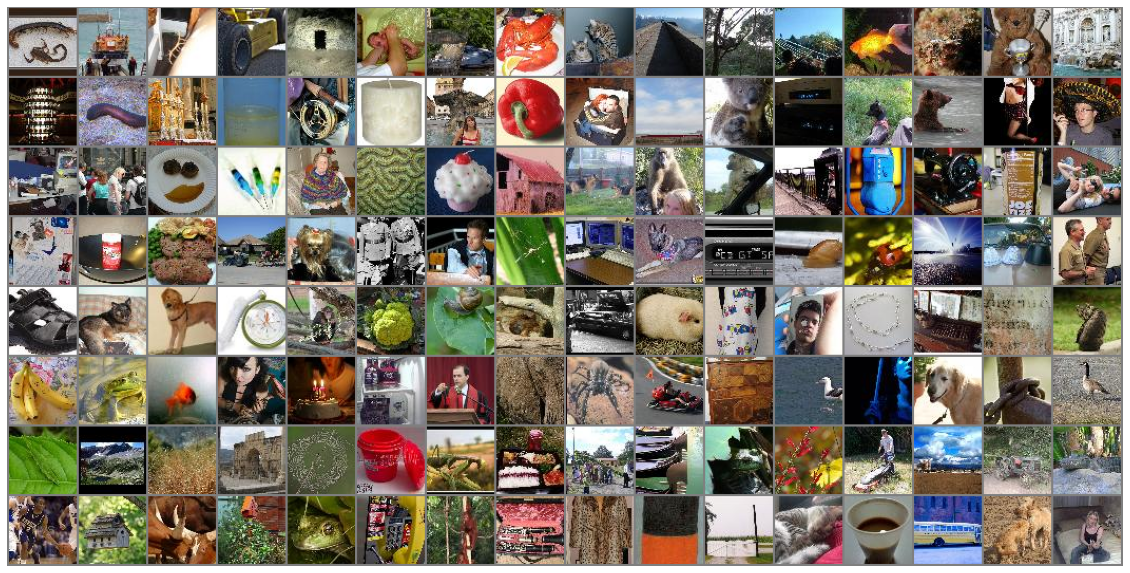

In [10]:
def imshow(img):
    plt.figure(figsize=(20, 20))
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()
for images, labels in trainloader:
    imshow(torchvision.utils.make_grid(images, nrow=16))
    break

### Visualization with the labels

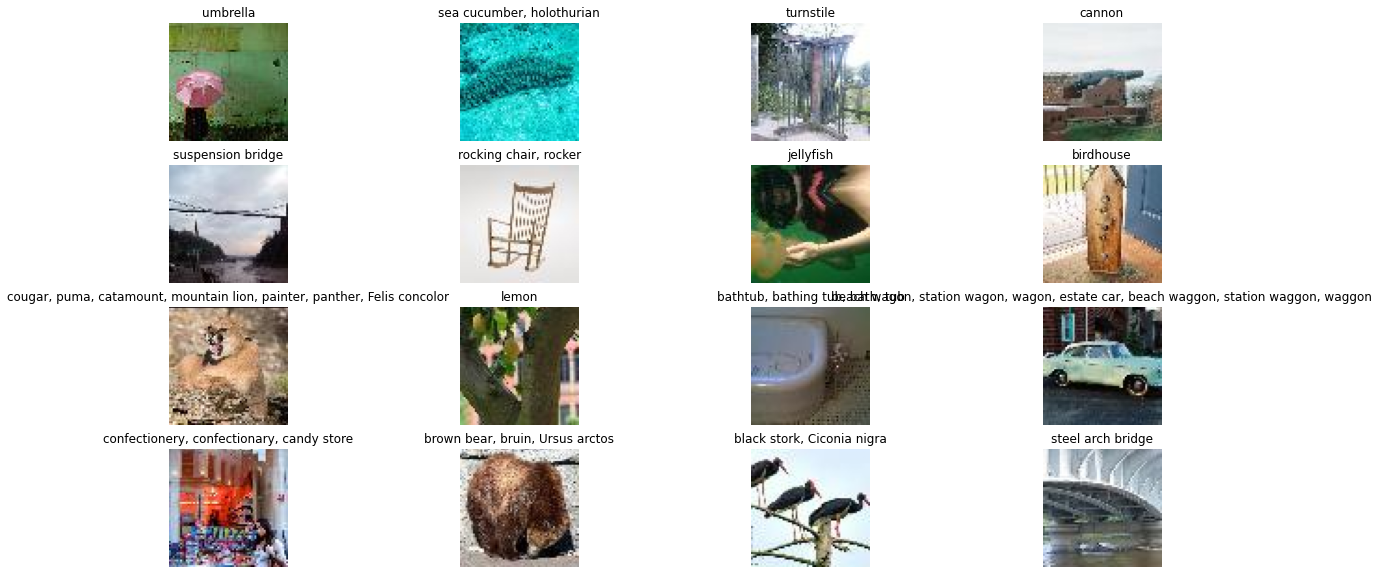

In [63]:
# Print some images with their labels
def show_images(images, labels):
    plt.figure(figsize=(20, 10))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        images[i] = images[i] / 2 + 0.5  # unnormalize
        npimg = images[i].numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        label = trainset.classes[labels[i].item()]
        # Find this label in content
        for j in range(len(content)):
            if content[j][0] == label:
                label = content[j][1]
                break
        plt.title(label)
        plt.axis('off')
    plt.show()

for images, labels in trainloader:
    show_images(images, labels)
    break

## Formatting the validation folder to read the images labelwise

In [ ]:
target_folder = './tiny-imagenet-200/val/'
test_folder   = './tiny-imagenet-200/test/'

# os.mkdir(test_folder)
val_dict = {}
with open('./tiny-imagenet-200/val/val_annotations.txt', 'r') as f:
    for line in f.readlines():
        split_line = line.split('\t')
        val_dict[split_line[0]] = split_line[1]
        
paths = glob.glob('./tiny-imagenet-200/val/images/*')
for path in paths:
    file = path.split('\\')[-1]
    folder = val_dict[file]
    if not os.path.exists(target_folder + str(folder)):
        os.mkdir(target_folder + str(folder))
        os.mkdir(target_folder + str(folder) + '/images')
    if not os.path.exists(test_folder + str(folder)):
        os.mkdir(test_folder + str(folder))
        os.mkdir(test_folder + str(folder) + '/images')
        
        
for path in paths:
    file = path.split('\\')[-1]
    folder = val_dict[file]
    if len(glob.glob(target_folder + str(folder) + '/images/*')) <25:
        dest = target_folder + str(folder) + '/images/' + str(file)
    else:
        dest = test_folder + str(folder) + '/images/' + str(file)
    move(path, dest)
    
rmdir('./tiny-imagenet-200/val/images')

## Defining the Basic Block Class for ResNet Architecture

In [5]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion * planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

## Defining the ResNet Architecture Class

In [6]:
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=200):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(2048 * block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

## Instantiating the ResNet18 Architecture with 200 classes and Block sizes of 2,2,2,2

In [7]:
def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2], num_classes=200)

In [19]:
model_resnet18 = ResNet18().to(device)
model_resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

## Instantiating the SGD Optimizer with learning rate of 0.001 and momentum of 0.9

In [20]:
optimizer_resnet18 = optim.SGD(model_resnet18.parameters(), lr=0.001, momentum=0.9) # SGD because of the last digit of my roll number is even

## Defining the CrossEntropy Loss function

In [17]:
def CrossEntropyLoss(outputs, labels):
    loss = 0
    for i in range(len(outputs)):
        loss += -np.log(outputs[i][labels[i].item()])
    return loss / len(outputs)

## Defining the training loop for the ResNet18 model

In [12]:
def train_model(model, optimizer, epochs, train_loss, train_accuracy):
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        for data in trainloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
        
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = CrossEntropyLoss(outputs, labels.long())
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
        avg_loss = running_loss/len(trainloader)
        avg_accuracy = correct/len(trainset)
        train_loss.append(avg_loss)
        train_accuracy.append(avg_accuracy)
        print("Epoch:", epoch+1, "Training Loss: ", avg_loss, "\t Training Accuracy: ", avg_accuracy)
    print("Training complete!")
    return train_loss, train_accuracy

## Emptying the GPU cache

In [12]:
torch.cuda.empty_cache() 

## Training the ResNet18 model for 10 epochs with a batch size of 128 and saving the training losses and accuracies.

In [21]:
train_loss_resnet18 = []
train_accuracy_resnet18 = []
train_loss_resnet18, train_accuracy_resnet18 = train_model(model_resnet18, optimizer_resnet18, 10, train_loss_resnet18, train_accuracy_resnet18)
print("Training Complete for ResNet18 using CrossEntropyLoss at 10 Epochs !!")

Epoch: 1 Training Loss:  4.547990052901265 	 Training Accuracy:  0.08184
Epoch: 2 Training Loss:  3.6924747981683677 	 Training Accuracy:  0.19174
Epoch: 3 Training Loss:  3.264556926839492 	 Training Accuracy:  0.26147
Epoch: 4 Training Loss:  2.9719543185685295 	 Training Accuracy:  0.31442
Epoch: 5 Training Loss:  2.7366216679668183 	 Training Accuracy:  0.35783
Epoch: 6 Training Loss:  2.5285627396820147 	 Training Accuracy:  0.39979
Epoch: 7 Training Loss:  2.3448896081856145 	 Training Accuracy:  0.43742
Epoch: 8 Training Loss:  2.175702697175848 	 Training Accuracy:  0.47299
Epoch: 9 Training Loss:  2.0116189838675282 	 Training Accuracy:  0.50885
Epoch: 10 Training Loss:  1.8483535475133326 	 Training Accuracy:  0.54491
Training complete!
Training Complete for ResNet18 using CrossEntropyLoss at 10 Epochs !!


### Training for additional 5 epochs

In [25]:
train_loss_resnet18, train_accuracy_resnet18 = train_model(model_resnet18, optimizer_resnet18, 5, train_loss_resnet18, train_accuracy_resnet18)
print("Training Complete for ResNet18 using CrossEntropyLoss at 15 Epochs !!")

Epoch: 11 Training Loss:  1.680138225445662 	 Training Accuracy:  0.58427
Epoch: 12 Training Loss:  1.5025189302461532 	 Training Accuracy:  0.62545
Epoch: 13 Training Loss:  1.3178444595440575 	 Training Accuracy:  0.67461
Epoch: 14 Training Loss:  1.1250148179281094 	 Training Accuracy:  0.72435
Epoch: 15 Training Loss:  0.9188690723665535 	 Training Accuracy:  0.78198
Training complete!
Training Complete for ResNet18 using CrossEntropyLoss at 15 Epochs !!


## Plotting the training loss and accuracy

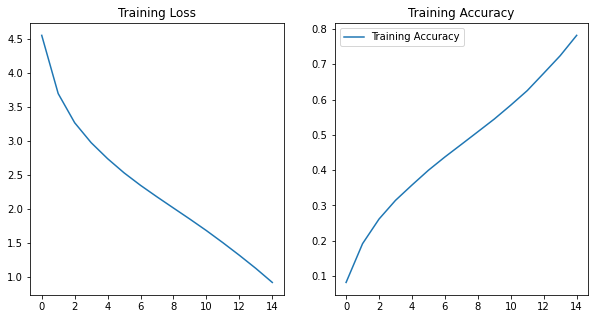

In [75]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_resnet18, label="Training Loss")
plt.title("Training Loss")
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_resnet18, label="Training Accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.show()

## Saving the model's weights and biases

In [26]:
# Save the model
torch.save(model_resnet18.state_dict(), "model_resnet18.pth")

# Save the list of losses and accuracies
import pickle
with open('train_loss_resnet18.pkl', 'wb') as f:
    pickle.dump(train_loss_resnet18, f)
with open('train_accuracy_resnet18.pkl', 'wb') as f:
    pickle.dump(train_accuracy_resnet18, f)

## Loading the formatted validation data into the dataloader

In [13]:
valset = datasets.ImageFolder('tiny-imagenet-200/val', transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=128, shuffle=False)

## Validation classes

In [21]:
print(valset.classes)

['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640', 'n01742172', 'n01768244', 'n01770393', 'n01774384', 'n01774750', 'n01784675', 'n01855672', 'n01882714', 'n01910747', 'n01917289', 'n01944390', 'n01945685', 'n01950731', 'n01983481', 'n01984695', 'n02002724', 'n02056570', 'n02058221', 'n02074367', 'n02085620', 'n02094433', 'n02099601', 'n02099712', 'n02106662', 'n02113799', 'n02123045', 'n02123394', 'n02124075', 'n02125311', 'n02129165', 'n02132136', 'n02165456', 'n02190166', 'n02206856', 'n02226429', 'n02231487', 'n02233338', 'n02236044', 'n02268443', 'n02279972', 'n02281406', 'n02321529', 'n02364673', 'n02395406', 'n02403003', 'n02410509', 'n02415577', 'n02423022', 'n02437312', 'n02480495', 'n02481823', 'n02486410', 'n02504458', 'n02509815', 'n02666196', 'n02669723', 'n02699494', 'n02730930', 'n02769748', 'n02788148', 'n02791270', 'n02793495', 'n02795169', 'n02802426', 'n02808440', 'n02814533', 'n02814860', 'n02815834', 'n02823428', 'n02837789', 'n02841315', 'n02843684'

In [22]:
print(len(valset.classes))

200


## Visualizing the validation data

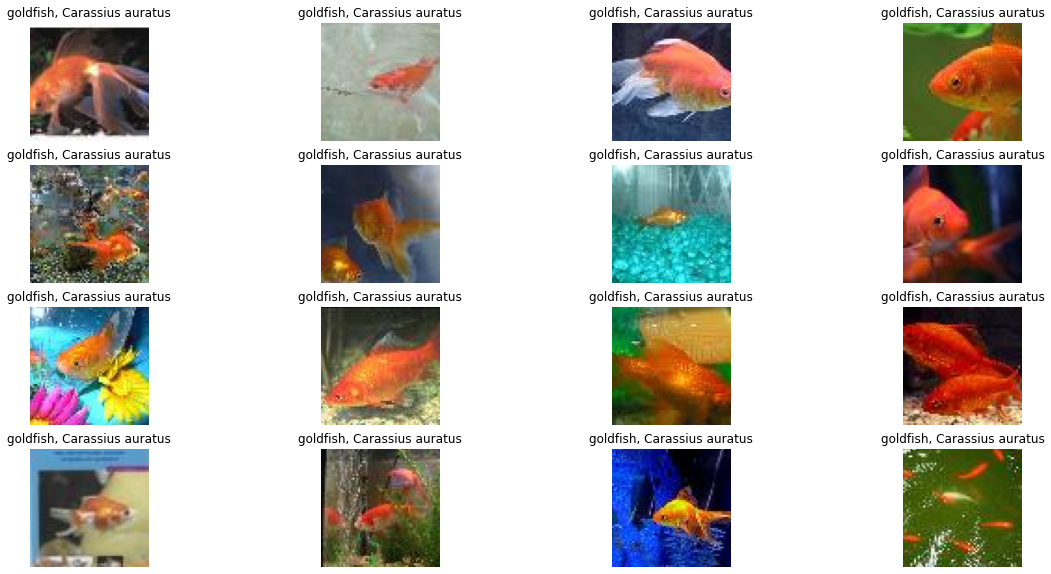

In [69]:
def show_images_val(images, labels):
    plt.figure(figsize=(20, 10))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        images[i] = images[i] / 2 + 0.5  # unnormalize
        npimg = images[i].numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        label = valset.classes[labels[i].item()]
        for j in range(len(content)):
            if content[j][0] == label:
                label = content[j][1]
                break
        plt.title(label)
        plt.axis('off')
    plt.show()

for images, labels in valloader:
    show_images_val(images, labels)
    break

## Testing the model on the validation data

In [74]:
val_loss = []
val_accuracy = []
model_resnet18.eval()
with torch.no_grad():
    for data in valloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_resnet18(inputs)
        loss = CrossEntropyLoss(outputs, labels.long())
        val_loss.append(loss.item())
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == labels).sum().item()
        val_accuracy.append(correct/len(labels))
        top5_val, top5_pred_val = outputs.topk(5, 1, True, True)
        top5_correct_val = top5_pred_val.eq(labels.view(-1, 1).expand_as(top5_pred_val))
        top5_correct_val = top5_correct_val.sum().item()
        top5_accuracy_val = top5_correct_val/len(labels)

print("Testing on Validation set Complete!")
print("Top-5 Validation Accuracy: ", top5_accuracy_val)
print("Validation Loss: ", np.mean(val_loss), "\tTest Accuracy: ", np.mean(val_accuracy))

Testing on Validation set Complete!
Top-5 Validation Accuracy:  0.375
Validation Loss:  3.0129431426525115 	Test Accuracy:  0.3533203125


## Testing the model on the Testing Data

In [ ]:
test_loss = []
test_accuracy = []
model_resnet18.eval()
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_resnet18(inputs)
        loss = CrossEntropyLoss(outputs, labels.long())
        test_loss.append(loss.item())
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == labels).sum().item()
        test_accuracy.append(correct/len(labels))
        top5_test, top5_pred_test = outputs.topk(5, 1, True, True)
        top5_correct_test = top5_pred_test.eq(labels.view(-1, 1).expand_as(top5_pred_test))
        top5_correct_test = top5_correct_test.sum().item()
        top5_accuracy_test = top5_correct_test/len(labels)

print("Testing on Test set Complete!")
print("Top-5 Test Accuracy: ", top5_accuracy_test)
print("Test Loss: ", np.mean(test_loss), "\tTest Accuracy: ", np.mean(test_accuracy))

Not running the above cell because there are no annotations given for the test data. Therefore, we can only make predictions on the test data but cannot evaluate the model's performance on the test data.

## Instantiating the ResNet18 Architecture and SGD optimizer for Triplet Loss

In [14]:
model_resnet18_triplet = ResNet18().to(device)
optimizer_resnet18_triplet = optim.SGD(model_resnet18_triplet.parameters(), lr=0.01, momentum=0.9)

## Defining the Triplet Loss class with hard mining

In [17]:
class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        # Calculate Euclidean distances
        pos_dist = torch.sqrt(torch.sum(torch.pow(anchor - positive, 2), dim=1))
        neg_dist = torch.sqrt(torch.sum(torch.pow(anchor - negative, 2), dim=1))
        # Calculate loss
        loss = torch.mean(torch.clamp(pos_dist - neg_dist + self.margin, min=0))
        return loss

In [18]:
criterion = TripletLoss()

In [22]:
train_loss_resnet18_triplet = []
train_accuracy_resnet18_triplet = []

## Training the model for Triplet Loss with 10 epochs 

In [ ]:
for epoch in range(10):
    running_loss = 0.0
    correct = 0
    for data in trainloader_triplet:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # Zero the parameter gradients
        optimizer_resnet18_triplet.zero_grad()

        # Forward pass
        outputs = model_resnet18_triplet(inputs)
        embeddings = nn.functional.normalize(outputs, p=2, dim=2)
        print(embeddings.shape)
        # Compute triplet loss
        anchor_indices = torch.arange(0, inputs.size(0), 3)
        anchor = embeddings[anchor_indices]
        print(anchor.shape)
        positive = embeddings[anchor_indices+1]
        print(positive.shape)
        negative = embeddings[anchor_indices+2]
        print(negative.shape)
        loss = criterion(anchor, positive, negative)

        # Backward pass and optimize
        loss.backward()
        optimizer_resnet18_triplet.step()

        # Compute accuracy
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        train_acc = correct / (i+1)
        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[Epoch %d, Batch %5d] Loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            print("Training Accuracy: ", train_acc)
            running_loss = 0.0

    train_loss_resnet18_triplet.append(running_loss / 100)
    train_accuracy_resnet18_triplet.append(np.mean(train_acc))


## Instantiating the ResNet18 Architecture and SGD optimizer for Central Loss

In [8]:
model_resnet18_centerloss = ResNet18().to(device)
optimizer_resnet18_centerloss = optim.SGD(model_resnet18_centerloss.parameters(), lr=0.01, momentum=0.9)

## Defining the Central Loss class

In [17]:
class CenterLoss(nn.Module):
    def __init__(self, num_classes=200, feat_dim=512, lambda_c=1.0):
        super(CenterLoss, self).__init__()
        self.num_classes = num_classes
        self.feat_dim = feat_dim
        self.lambda_c = lambda_c
        
        self.centers = nn.Parameter(torch.randn(self.num_classes, self.feat_dim))
    
    def forward(self, x, labels):
        batch_size = x.size(0)
        dist_mat = torch.pow(x, 2).sum(dim=1, keepdim=True).expand(batch_size, self.num_classes) + \
                   torch.pow(self.centers, 2).sum(dim=1, keepdim=True).expand(self.num_classes, batch_size).t()
        dist_mat.addmm_(1, -2, x, self.centers.t())
        
        # get center loss
        classes = torch.arange(self.num_classes).long()
        classes = classes.to(device)
        labels = labels.unsqueeze(1).expand(batch_size, self.num_classes)
        mask = labels.eq(classes.expand(batch_size, self.num_classes))
        
        centers_batch = self.centers.index_select(0, labels.view(-1)).view(batch_size, -1)
        batch_centers = centers_batch[mask].view(batch_size, -1)
        diff = batch_centers - x
        center_loss = center_loss / batch_size * self.lambda_c
        
        # get softmax loss
        criterion = nn.CrossEntropyLoss()
        logits = torch.mm(x, self.centers.t())
        softmax_loss = criterion(logits, labels)
        # total loss
        loss = softmax_loss + center_loss
        return loss

In [37]:
np.array(trainset).shape

(100000, 2)

## Creating a Central Loss object

In [43]:
criterion = CenterLoss()

## Defining the training loop for the Central Loss model

In [19]:
def train_model_center_loss(model, optimizer, epochs, train_loss, train_accuracy):
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        for data in trainloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
        
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
        avg_loss = running_loss/len(trainloader)
        avg_accuracy = correct/len(trainset)
        train_loss.append(avg_loss)
        train_accuracy.append(avg_accuracy)
        print("Epoch:", epoch+1, "Training Loss: ", avg_loss, "\t Training Accuracy: ", avg_accuracy)
    print("Training complete!")
    return train_loss, train_accuracy

## Training the model for Central Loss with 10 epochs

In [ ]:
train_loss_resnet18_centerloss = []
train_accuracy_resnet18_centerloss = []
train_loss_resnet18_centerloss, train_accuracy_resnet18_centerloss = train_model_center_loss(model_resnet18_centerloss, optimizer_resnet18_centerloss, 10, train_loss_resnet18_centerloss, train_accuracy_resnet18_centerloss)

## Question 2

## Loading the STL10 dataset and normalizing it

    batch_size = 128

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


trainloader_STL10 = DataLoader(datasets.STL10(root='./data', split='train', download=True, transform=transform), batch_size=128, shuffle=True, num_workers=2)
testloader_STL10 = DataLoader(datasets.STL10(root='./data', split='test', download=True, transform=transform), batch_size=128, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
trainloader_STL10.dataset

Dataset STL10
    Number of datapoints: 5000
    Root location: ./data
    Split: train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [8]:
testloader_STL10.dataset

Dataset STL10
    Number of datapoints: 8000
    Root location: ./data
    Split: test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

## Visualizing the STL10 dataset

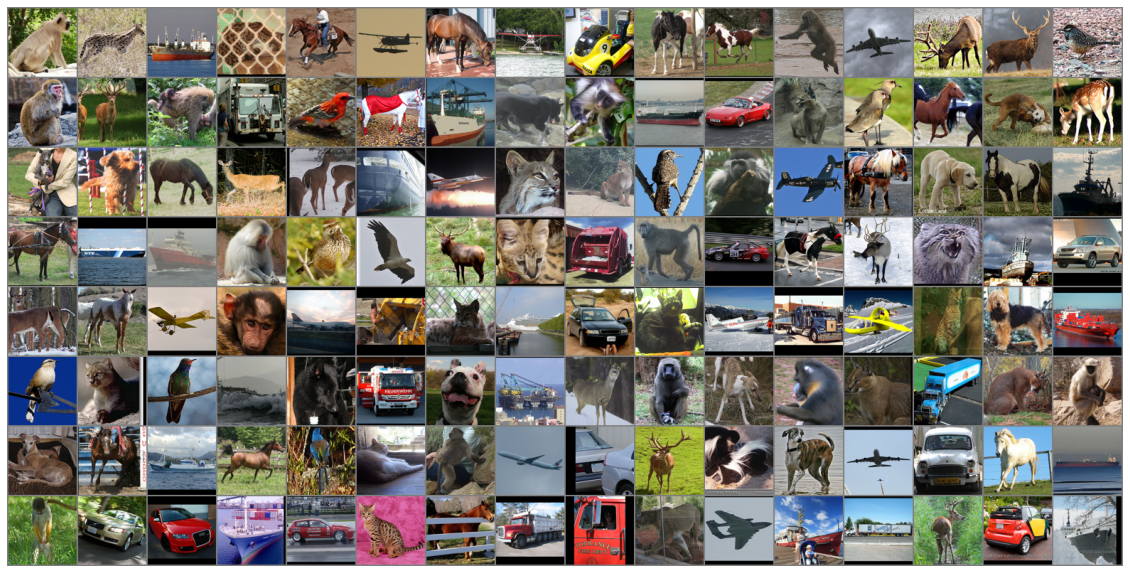

In [9]:
# Visualize some of the images
def imshow(img):
    plt.figure(figsize=(20, 20))
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

for images, labels in trainloader_STL10:
    imshow(torchvision.utils.make_grid(images, nrow=16))
    break

## Classes of the STL10 dataset

In [9]:
classes = ('airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck')

## Plotting some images from the STL10 dataset with their corresponding labels

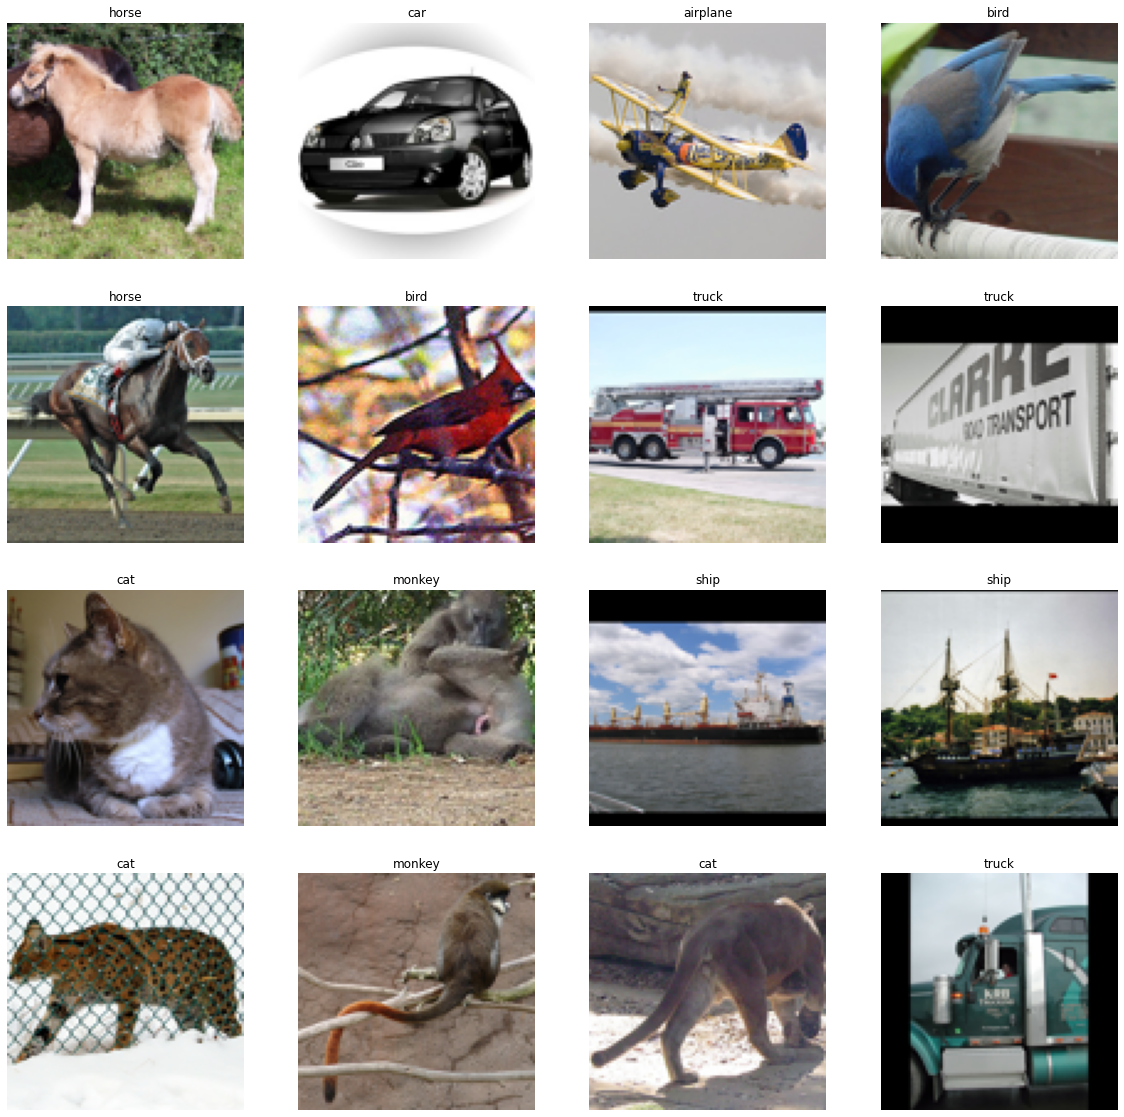

In [13]:
def show_images(images, labels):
    plt.figure(figsize=(20, 20))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        images[i] = images[i] / 2 + 0.5
        plt.imshow(images[i].permute(1, 2, 0))
        plt.title(classes[labels[i].item()])
        plt.axis('off')
    plt.show()

for images, labels in trainloader_STL10:
    show_images(images, labels)
    break

## Creating an Autoencoder class with 1 encoding layer and 1 decoding layer using the ReLU activation function

In [10]:
class AutoEncoder(nn.Module):
    def __init__(self, input_size, output_size):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Linear(input_size, output_size)
        self.decoder = nn.Linear(output_size, input_size)

    def forward(self, x):
        encoded = nn.ReLU()(self.encoder(x))
        decoded = nn.ReLU()(self.decoder(encoded))
        return decoded
    
    def Encoding(self, x):
        encoded = nn.ReLU()(self.encoder(x))
        return encoded

## Size of one batch of images from the STL10 dataset

In [43]:
# Print the shape of the data
for images, labels in trainloader_STL10:
    print(images.shape, labels.shape)
    break

torch.Size([128, 3, 96, 96]) torch.Size([128])


## Strucutre of the Classifier according to Roll Number (B20AI052)

In [11]:
X = [1024, 1000, 500, 256, 128, 64] # As roll number is even

## Instantiating a list of 6 autoencoder objects with six different encoding layer sizes and six different decoding layer sizes respectively.

In [12]:
AEs = [AutoEncoder(3*96*96, X[0]).to(device), AutoEncoder(X[0], X[1]).to(device), AutoEncoder(X[1], X[2]).to(device), AutoEncoder(X[2], X[3]).to(device), AutoEncoder(X[3], X[4]).to(device), AutoEncoder(X[4], X[5]).to(device)]
Optimizers = [optim.Adam(AEs[0].parameters(), lr=0.001), optim.Adam(AEs[1].parameters(), lr=0.001), optim.Adam(AEs[2].parameters(), lr=0.001), optim.Adam(AEs[3].parameters(), lr=0.001), optim.Adam(AEs[4].parameters(), lr=0.001), optim.Adam(AEs[5].parameters(), lr=0.001)]
criterion = nn.MSELoss()

In [46]:
print(len(AEs))

6


## Defining the training loops for each autoencoder

In [13]:
def train_autoencoder1(model, optimizer, epochs, train_loss):
    for epoch in range(epochs):
        running_loss = 0.0
        for data in trainloader_STL10:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            images = images.view(images.shape[0], -1)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, images)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss/len(trainloader_STL10)
        train_loss.append(avg_loss)
        print("Epoch:", epoch+1, "Training Loss: ", avg_loss)
    print("Training complete!")
    return train_loss

In [14]:
def train_autoencoder2(model1, model2, optimizer, epochs, train_loss):
    for epoch in range(epochs):
        running_loss = 0.0
        for data in trainloader_STL10:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            images = images.view(images.shape[0], -1)
            optimizer.zero_grad()
            output1 = model1.Encoding(images)
            outputs = model2(output1)
            loss = criterion(outputs, output1)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss/len(trainloader_STL10)
        train_loss.append(avg_loss)
        print("Epoch:", epoch+1, "Training Loss: ", avg_loss)
    print("Training complete!")
    return train_loss

In [15]:
def train_autoencoder3(model1, model2, model3, optimizer, epochs, train_loss):
    for epoch in range(epochs):
        running_loss = 0.0
        for data in trainloader_STL10:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            images = images.view(images.shape[0], -1)
            optimizer.zero_grad()
            output1 = model1.Encoding(images)
            output2 = model2.Encoding(output1)
            outputs = model3(output2)
            loss = criterion(outputs, output2)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss/len(trainloader_STL10)
        train_loss.append(avg_loss)
        print("Epoch:", epoch+1, "Training Loss: ", avg_loss)
    print("Training complete!")
    return train_loss

In [16]:
def train_autoencoder4(model1, model2, model3, model4, optimizer, epochs, train_loss):
    for epoch in range(epochs):
        running_loss = 0.0
        for data in trainloader_STL10:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            images = images.view(images.shape[0], -1)
            optimizer.zero_grad()
            output1 = model1.Encoding(images)
            output2 = model2.Encoding(output1)
            output3 = model3.Encoding(output2)
            outputs = model4(output3)
            loss = criterion(outputs, output3)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss/len(trainloader_STL10)
        train_loss.append(avg_loss)
        print("Epoch:", epoch+1, "Training Loss: ", avg_loss)
    print("Training complete!")
    return train_loss

In [17]:
def train_autoencoder5(model1, model2, model3, model4, model5, optimizer, epochs, train_loss):
    for epoch in range(epochs):
        running_loss = 0.0
        for data in trainloader_STL10:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            images = images.view(images.shape[0], -1)
            optimizer.zero_grad()
            output1 = model1.Encoding(images)
            output2 = model2.Encoding(output1)
            output3 = model3.Encoding(output2)
            output4 = model4.Encoding(output3)
            outputs = model5(output4)
            loss = criterion(outputs, output4)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss/len(trainloader_STL10)
        train_loss.append(avg_loss)
        print("Epoch:", epoch+1, "Training Loss: ", avg_loss)
    print("Training complete!")
    return train_loss

In [18]:
def train_autoencoder6(model1, model2, model3, model4, model5, model6, optimizer, epochs, train_loss):
    for epoch in range(epochs):
        running_loss = 0.0
        for data in trainloader_STL10:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            images = images.view(images.shape[0], -1)
            optimizer.zero_grad()
            output1 = model1.Encoding(images)
            output2 = model2.Encoding(output1)
            output3 = model3.Encoding(output2)
            output4 = model4.Encoding(output3)
            output5 = model5.Encoding(output4)
            outputs = model6(output5)
            loss = criterion(outputs, output5)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss/len(trainloader_STL10)
        train_loss.append(avg_loss)
        print("Epoch:", epoch+1, "Training Loss: ", avg_loss)
    print("Training complete!")
    return train_loss

In [19]:
train_loss1 = []
train_loss2 = []
train_loss3 = []
train_loss4 = []
train_loss5 = []
train_loss6 = []

## Training AE1

In [54]:
train_loss1 = train_autoencoder1(AEs[0], Optimizers[0], 10, train_loss1)

Epoch: 1 Training Loss:  0.3038179278373718
Epoch: 2 Training Loss:  0.29446936920285227
Epoch: 3 Training Loss:  0.29112856462597847
Epoch: 4 Training Loss:  0.28850892558693886
Epoch: 5 Training Loss:  0.2833679378032684
Epoch: 6 Training Loss:  0.280848516151309
Epoch: 7 Training Loss:  0.2777954451739788
Epoch: 8 Training Loss:  0.2746731698513031
Epoch: 9 Training Loss:  0.2716262027621269
Epoch: 10 Training Loss:  0.2711761757731438
Training complete!


## Training AE2

In [59]:
train_loss2 = train_autoencoder2(AEs[0], AEs[1], Optimizers[1], 10, train_loss2)

Epoch: 1 Training Loss:  41.727115851640704
Epoch: 2 Training Loss:  32.93221936225891
Epoch: 3 Training Loss:  32.07056016921997
Epoch: 4 Training Loss:  32.42007880210876
Epoch: 5 Training Loss:  30.331939773261546
Epoch: 6 Training Loss:  30.323654317855834
Epoch: 7 Training Loss:  31.39849853515625
Epoch: 8 Training Loss:  31.02434377670288
Epoch: 9 Training Loss:  30.98940238952637
Epoch: 10 Training Loss:  29.59950248003006
Training complete!


## Training AE3

In [55]:
train_loss3 = train_autoencoder3(AEs[0], AEs[1], AEs[2], Optimizers[2], 10, train_loss3)

Epoch: 1 Training Loss:  5.499083068966866
Epoch: 2 Training Loss:  2.4903332009911536
Epoch: 3 Training Loss:  2.1669549852609635
Epoch: 4 Training Loss:  1.9160076886415482
Epoch: 5 Training Loss:  1.8952501982450485
Epoch: 6 Training Loss:  1.8011401191353797
Epoch: 7 Training Loss:  1.7632052809000016
Epoch: 8 Training Loss:  1.7449606984853745
Epoch: 9 Training Loss:  1.6928534381091596
Epoch: 10 Training Loss:  1.813394846022129
Training complete!


## Training AE4

In [56]:
train_loss4 = train_autoencoder4(AEs[0], AEs[1], AEs[2], AEs[3], Optimizers[3], 10, train_loss4)

Epoch: 1 Training Loss:  4.8335756182670595
Epoch: 2 Training Loss:  2.18724362552166
Epoch: 3 Training Loss:  1.7611338198184967
Epoch: 4 Training Loss:  1.6349599108099937
Epoch: 5 Training Loss:  1.5259217500686646
Epoch: 6 Training Loss:  1.449666327238083
Epoch: 7 Training Loss:  1.3851825997233391
Epoch: 8 Training Loss:  1.3736420139670371
Epoch: 9 Training Loss:  1.3401730954647064
Epoch: 10 Training Loss:  1.3171387895941735
Training complete!


## Training AE5

In [57]:
train_loss5 = train_autoencoder5(AEs[0], AEs[1], AEs[2], AEs[3], AEs[4], Optimizers[4], 10, train_loss5)

Epoch: 1 Training Loss:  11.67928010225296
Epoch: 2 Training Loss:  4.754090788960457
Epoch: 3 Training Loss:  4.116962707042694
Epoch: 4 Training Loss:  4.026648128032685
Epoch: 5 Training Loss:  3.82041882276535
Epoch: 6 Training Loss:  3.617280888557434
Epoch: 7 Training Loss:  3.4585824638605116
Epoch: 8 Training Loss:  3.409708333015442
Epoch: 9 Training Loss:  3.3432934075593947
Epoch: 10 Training Loss:  3.308962282538414
Training complete!


## Training AE6

In [58]:
train_loss6 = train_autoencoder6(AEs[0], AEs[1], AEs[2], AEs[3], AEs[4], AEs[5], Optimizers[5], 10, train_loss6)

Epoch: 1 Training Loss:  24.299004673957825
Epoch: 2 Training Loss:  8.89013296365738
Epoch: 3 Training Loss:  7.518487584590912
Epoch: 4 Training Loss:  6.967295849323273
Epoch: 5 Training Loss:  6.328946959972382
Epoch: 6 Training Loss:  6.024802088737488
Epoch: 7 Training Loss:  5.944502758979797
Epoch: 8 Training Loss:  5.740398707985878
Epoch: 9 Training Loss:  5.642074960470199
Epoch: 10 Training Loss:  5.577557355165482
Training complete!


## Plots for training losses for each of the six autoencoders

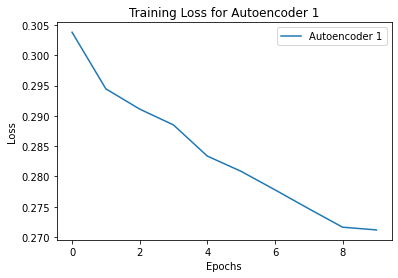

In [61]:
# Plot the training loss for autoencoder 1
plt.plot(train_loss1, label='Autoencoder 1')
plt.title('Training Loss for Autoencoder 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

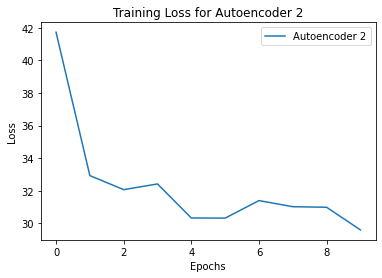

In [62]:
plt.plot(train_loss2, label='Autoencoder 2')
plt.title('Training Loss for Autoencoder 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

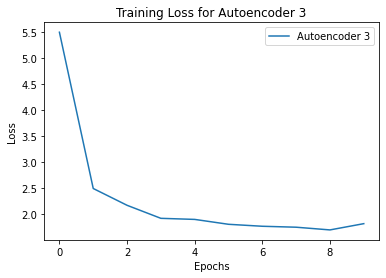

In [63]:
plt.plot(train_loss3, label='Autoencoder 3')
plt.title('Training Loss for Autoencoder 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

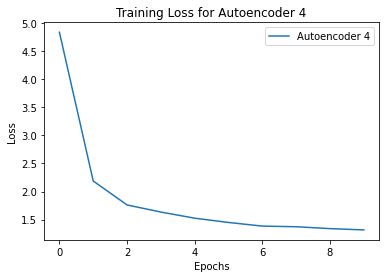

In [64]:
plt.plot(train_loss4, label='Autoencoder 4')
plt.title('Training Loss for Autoencoder 4')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

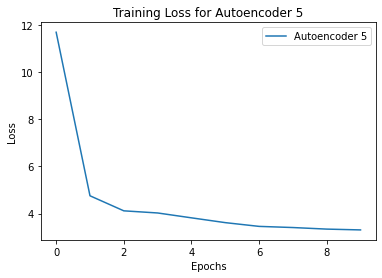

In [65]:
plt.plot(train_loss5, label='Autoencoder 5')
plt.title('Training Loss for Autoencoder 5')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

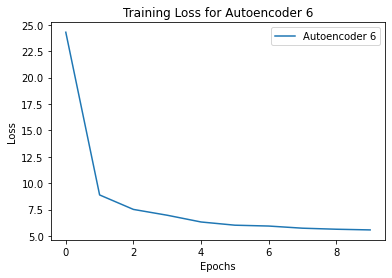

In [66]:
plt.plot(train_loss6, label='Autoencoder 6')
plt.title('Training Loss for Autoencoder 6')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Saving the models

In [70]:
# Save the models
torch.save(AEs[0].state_dict(), 'AE1.pth')
torch.save(AEs[1].state_dict(), 'AE2.pth')
torch.save(AEs[2].state_dict(), 'AE3.pth')
torch.save(AEs[3].state_dict(), 'AE4.pth')
torch.save(AEs[4].state_dict(), 'AE5.pth')
torch.save(AEs[5].state_dict(), 'AE6.pth')

## Loading the saved models

In [31]:
# Load the models
AEs[0].load_state_dict(torch.load('AE1.pth'))
AEs[1].load_state_dict(torch.load('AE2.pth'))
AEs[2].load_state_dict(torch.load('AE3.pth'))
AEs[3].load_state_dict(torch.load('AE4.pth'))
AEs[4].load_state_dict(torch.load('AE5.pth'))
AEs[5].load_state_dict(torch.load('AE6.pth'))

<All keys matched successfully>

## Layers pre-trained on STL10 dataset using autoencoders and would be added to the classifier

In [32]:
model_layers = [AEs[0].encoder, AEs[1].encoder, AEs[2].encoder, AEs[3].encoder, AEs[4].encoder, AEs[5].encoder]

## Building the Classifier class using pre-trained layers

In [33]:
class Classifier(nn.Module):
    def __init__(self, model_layers):
        super(Classifier, self).__init__()
        self.model_layers = model_layers
        self.dropout = nn.Dropout(0.2)
        self.layers = []
        for i in range(len(model_layers)):
            self.layers.append(self.model_layers[i])
            self.layers.append(nn.ReLU())
        self.layers.append(nn.Linear(64, 10))
        self.layers.append(nn.LogSoftmax(dim=1))
        self.final = nn.Sequential(*self.layers)
    def forward(self, x):
        return self.final(x)

## Instantiating the classifier object with criterion as NLLLoss and optimizer as Adam with learning rate of 0.001.

In [34]:
classifier = Classifier(model_layers).to(device)
criterion = nn.NLLLoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.001)

In [58]:
classifier

Classifier(
  (dropout): Dropout(p=0.2, inplace=False)
  (final): Sequential(
    (0): Linear(in_features=27648, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1000, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1000, out_features=500, bias=True)
    (5): ReLU()
    (6): Linear(in_features=500, out_features=256, bias=True)
    (7): ReLU()
    (8): Linear(in_features=256, out_features=128, bias=True)
    (9): ReLU()
    (10): Linear(in_features=128, out_features=64, bias=True)
    (11): ReLU()
    (12): Linear(in_features=64, out_features=10, bias=True)
    (13): LogSoftmax(dim=1)
  )
)

## Defining the training loop for the classifier

In [35]:
def train_classifier(model, optimizer, epochs, train_loss, train_acc):
    for epoch in range(epochs):
        running_loss = 0.0
        running_acc = 0.0
        for data in trainloader_STL10:
            images, labels = data
            images = images.view(-1, 3*96*96)
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            running_acc += (predicted == labels).sum().item()
        avg_loss = running_loss/len(trainloader_STL10)
        train_loss.append(avg_loss)
        avg_acc = running_acc/len(trainloader_STL10.dataset)
        train_acc.append(avg_acc)
        print("Epoch:", epoch+1, "Training Loss: ", avg_loss, "Training Accuracy: ", avg_acc)
    print("Training complete!")
    return train_loss, train_acc

## Training the classifier for 20 epochs

In [36]:
train_loss_classifier = []
train_acc_classifier = []
train_loss_classifier, train_acc_classifier = train_classifier(classifier, optimizer, 20, train_loss_classifier, train_acc_classifier)

Epoch: 1 Training Loss:  2.657470792531967 Training Accuracy:  0.1568
Epoch: 2 Training Loss:  1.924582263827324 Training Accuracy:  0.2668
Epoch: 3 Training Loss:  1.8103835791349412 Training Accuracy:  0.2966
Epoch: 4 Training Loss:  1.7165536642074586 Training Accuracy:  0.3338
Epoch: 5 Training Loss:  1.606030285358429 Training Accuracy:  0.374
Epoch: 6 Training Loss:  1.523705893754959 Training Accuracy:  0.4088
Epoch: 7 Training Loss:  1.421444556117058 Training Accuracy:  0.462
Epoch: 8 Training Loss:  1.3754271477460862 Training Accuracy:  0.482
Epoch: 9 Training Loss:  1.2950413256883622 Training Accuracy:  0.5302
Epoch: 10 Training Loss:  1.1330712661147118 Training Accuracy:  0.5732
Epoch: 11 Training Loss:  1.019545416533947 Training Accuracy:  0.6194
Epoch: 12 Training Loss:  0.917233356833458 Training Accuracy:  0.6712
Epoch: 13 Training Loss:  0.8722163900732994 Training Accuracy:  0.6782
Epoch: 14 Training Loss:  0.8396431557834149 Training Accuracy:  0.6984
Epoch: 15 T

## Defining the testing loop for the classifier

In [37]:
def test_classifier(model, testloader, test_acc):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.view(-1, 3*96*96)
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_acc.append(100 * correct / total)
    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))
    return test_acc

## Testing the classifier on the test data

In [38]:
test_accuracy_classifier = []
test_accuracy_classifier = test_classifier(classifier, testloader_STL10, test_accuracy_classifier)

Accuracy of the network on the 10000 test images: 38.4 %


In [39]:
print(classes)

('airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck')


## Obtaining the class-wise accuracy of the classifier

In [40]:
def class_accuracy(model, testloader, test_acc_class):
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.view(-1, 3*96*96)
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
    for i in range(10):
        test_acc_class.append(100 * class_correct[i] / class_total[i])
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))
    return test_acc_class

In [41]:
classwise_test_accuracy_classifier = []
classwise_test_accuracy_classifier = class_accuracy(classifier, testloader_STL10, classwise_test_accuracy_classifier)

Accuracy of airplane : 70 %
Accuracy of  bird : 45 %
Accuracy of   car : 42 %
Accuracy of   cat : 10 %
Accuracy of  deer : 55 %
Accuracy of   dog : 25 %
Accuracy of horse : 33 %
Accuracy of monkey : 31 %
Accuracy of  ship : 52 %
Accuracy of truck : 40 %


## Plotting t-SNE for this model using embedding from X[3] from the autoencoder and using the first 500 images of each class from the test dataset for this visualization.

In [49]:
lt_embed = []
lt_lb = []
ln = 0 
with torch.no_grad():
  for images, labels in testloader_STL10:
    output1 = AEs[0].Encoding(images.to(device).view(-1, 3*96*96))
    output2 = AEs[1].Encoding(output1)
    output3 = AEs[2].Encoding(output2)
    output4 = AEs[3].Encoding(output3)
    embed = AEs[4].Encoding(output4)
    lt_embed.append(embed.cpu())
    lt_lb.append(labels)
    ln += len(images)
    if(ln>=500):
      break
embed_tensor = torch.cat(lt_embed)
label_tensor = torch.cat(lt_lb)

In [50]:
embed_tensor.shape

torch.Size([512, 128])

In [51]:
label_tensor

tensor([6, 7, 5, 0, 3, 1, 1, 1, 4, 4, 0, 0, 4, 0, 1, 5, 4, 9, 0, 6, 5, 3, 1, 3,
        2, 6, 5, 5, 2, 7, 1, 6, 3, 7, 9, 2, 4, 7, 9, 5, 1, 9, 0, 6, 4, 9, 1, 1,
        3, 2, 5, 4, 0, 0, 9, 8, 6, 7, 2, 0, 0, 1, 1, 7, 9, 6, 1, 8, 0, 4, 2, 1,
        7, 1, 2, 7, 5, 3, 5, 7, 3, 0, 9, 3, 0, 1, 8, 0, 2, 5, 4, 1, 3, 6, 5, 1,
        7, 5, 8, 5, 8, 3, 0, 2, 8, 7, 1, 2, 3, 4, 3, 2, 8, 1, 9, 0, 1, 4, 8, 1,
        4, 1, 8, 5, 2, 7, 8, 3, 4, 3, 6, 9, 7, 1, 5, 3, 0, 1, 5, 7, 1, 7, 1, 4,
        4, 3, 3, 9, 6, 3, 3, 8, 7, 5, 0, 1, 7, 1, 2, 8, 6, 5, 5, 3, 3, 8, 9, 1,
        0, 6, 6, 4, 4, 4, 8, 2, 3, 3, 1, 2, 0, 5, 8, 7, 8, 3, 7, 2, 6, 9, 6, 9,
        2, 8, 8, 6, 8, 9, 1, 4, 2, 7, 8, 7, 3, 3, 4, 4, 2, 5, 9, 4, 8, 3, 4, 1,
        9, 3, 6, 1, 0, 0, 0, 4, 2, 1, 4, 3, 9, 8, 7, 2, 8, 1, 6, 1, 6, 8, 5, 9,
        8, 0, 8, 9, 0, 5, 1, 6, 0, 3, 0, 2, 9, 6, 7, 6, 3, 7, 5, 5, 7, 1, 6, 9,
        2, 3, 8, 2, 5, 7, 8, 2, 1, 8, 1, 1, 9, 0, 8, 0, 4, 1, 8, 0, 0, 2, 9, 0,
        9, 1, 8, 3, 7, 7, 5, 3, 4, 9, 0,

In [52]:
from sklearn.manifold import TSNE

In [53]:
tsne = TSNE(n_components=2, random_state=0)

In [54]:
tsne_data = tsne.fit_transform(embed_tensor)

In [55]:
tsne_data.shape

(512, 2)

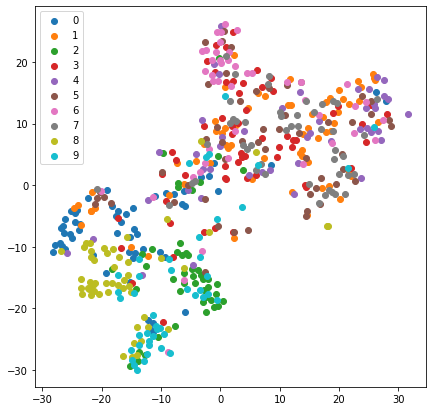

In [56]:
scatter_x = tsne_data[:,0]
scatter_y = tsne_data[:,1]
group = label_tensor

fig, ax = plt.subplots(figsize=(7, 7))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix],  label = g)
ax.legend()
plt.show()